# This file contains a time comparison of original SHAP lybrary and our model Fast_SHAP.


In [12]:
from fast_shap import fast_shap
import shap

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from time import time

## Lets start with first dataset BOSTON

In [22]:
X,y = shap.datasets.boston()

In [42]:
X_scale = StandardScaler().fit_transform(X)
y = np.array(y)
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y, test_size=0.1, random_state=0)

knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

## We use KNN Regressor as very hard explaining model

### We start with our model fast_shap

In [50]:
#cor_matrix = np.abs(np.array(X_test.corr()))
cor_matrix =  np.abs(np.corrcoef(X_test.T))

"""
Init our class:
– num_neigbor : nuber of closest neigbor which will be included in calcukation
– X_test:       array of input samples to start calculation
– knn.predict:  model predictor, function
– print_result: just a indexer to helping with output printing durung fitting
"""
num_neigbor = 3 
fast_shap_boston = fast_shap(num_neigbor,X_test,knn.predict, print_result = True)

calculate for feature 0 out of 13
calculate for feature 1 out of 13
calculate for feature 2 out of 13
calculate for feature 3 out of 13
calculate for feature 4 out of 13
calculate for feature 5 out of 13
calculate for feature 6 out of 13
calculate for feature 7 out of 13
calculate for feature 8 out of 13
calculate for feature 9 out of 13
calculate for feature 10 out of 13
calculate for feature 11 out of 13
calculate for feature 12 out of 13


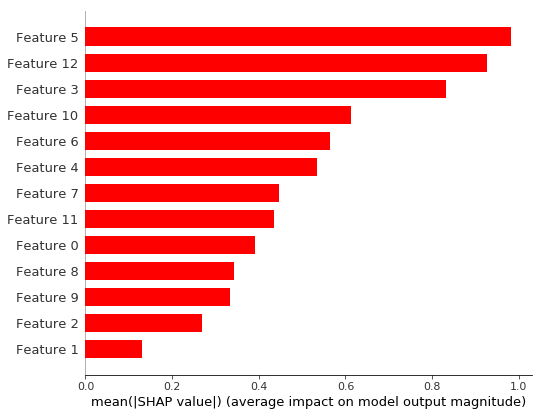

Shap values calculated via fast_shap approximation in: 7.191374063491821 second


In [51]:
"""
Init our class:
– fast_shap.fit(cor_matrix) : method to calculate feature importance

output:

SHAPLEY VALUES array : same with original SHAP

"""
#here during calculation we will check time, and use visualusation tool by SHAP lybrary
st1 = time()
dd = fast_shap_boston.fit(cor_matrix)
st2 = time()
shap.summary_plot(dd.T, X_test, plot_type="bar", color="red")

print("Shap values calculated via fast_shap approximation in: {} second".format(st2-st1))

### Same calculation with original lybrary

In [52]:
st1x = time()
shap.initjs()
explainer = shap.KernelExplainer(knn.predict, X_test)
shap_values = explainer.shap_values(X_test)
st2x = time()

  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  2%|▏         | 1/51 [00:01<01:04,  1.29s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  4%|▍         | 2/51 [00:02<01:01,  1.25s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num

 43%|████▎     | 22/51 [00:26<00:35,  1.22s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 45%|████▌     | 23/51 [00:27<00:33,  1.20s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 47%|████▋     | 24/51 [00:29<00:33,  1.23s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to 

 86%|████████▋ | 44/51 [00:53<00:08,  1.21s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 88%|████████▊ | 45/51 [00:54<00:07,  1.23s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 90%|█████████ | 46/51 [00:55<00:06,  1.23s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to 

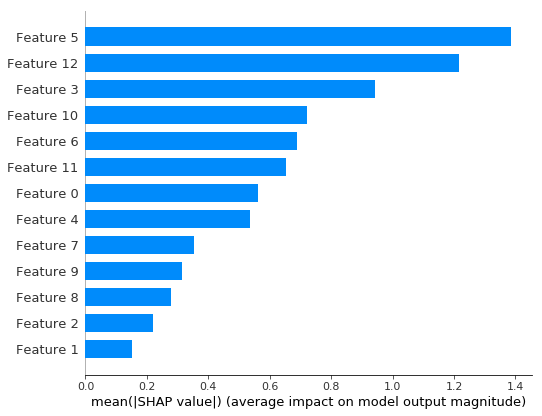

Shap values calculated via lybrary: 61.87958097457886 second


In [53]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
print("Shap values calculated via lybrary: {} second".format(st2x-st1x))

### Values have some differences but in central part, where values have really closed result, biggest and smallest same! 


## Next  Dataset Diabets:

In [54]:
X,y = shap.datasets.diabetes()
X_scale = StandardScaler().fit_transform(X)
y = np.array(y)
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y, test_size=0.1, random_state=0)

knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, Y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [59]:
cor_matrix =  np.abs(np.corrcoef(X_test.T))
num_neigbor = 4 
fast_shap_diabet = fast_shap(num_neigbor,X_test,knn.predict, print_result = True)

calculate for feature 0 out of 10
calculate for feature 1 out of 10
calculate for feature 2 out of 10
calculate for feature 3 out of 10
calculate for feature 4 out of 10
calculate for feature 5 out of 10
calculate for feature 6 out of 10
calculate for feature 7 out of 10
calculate for feature 8 out of 10
calculate for feature 9 out of 10


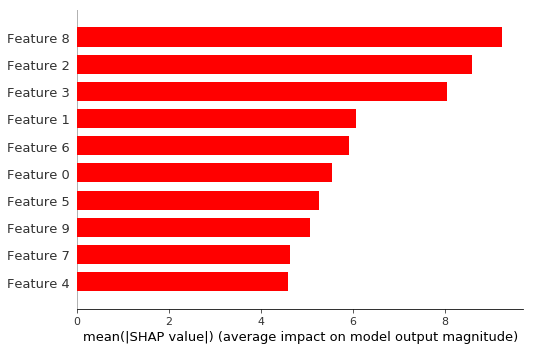

Shap values calculated via fast_shap approximation in: 10.366757869720459 second


In [60]:
st1 = time()
dd = fast_shap_diabet.fit(cor_matrix)
st2 = time()
shap.summary_plot(dd.T, X_test, plot_type="bar", color="red")

print("Shap values calculated via fast_shap approximation in: {} second".format(st2-st1))

In [57]:
st1x = time()
shap.initjs()
explainer = shap.KernelExplainer(knn.predict, X_test)
shap_values = explainer.shap_values(X_test)
st2x = time()

  0%|          | 0/45 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  2%|▏         | 1/45 [00:00<00:22,  1.95it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
  4%|▍         | 2/45 [00:01<00:22,  1.94it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num

 49%|████▉     | 22/45 [00:11<00:11,  1.97it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 51%|█████     | 23/45 [00:11<00:11,  1.97it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
 53%|█████▎    | 24/45 [00:12<00:10,  1.99it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to 

 98%|█████████▊| 44/45 [00:22<00:00,  1.87it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
100%|██████████| 45/45 [00:23<00:00,  1.90it/s]


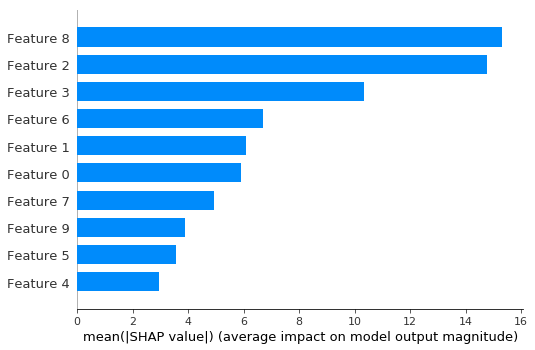

Shap values calculated via lybrary: 23.158570051193237 second


In [58]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
print("Shap values calculated via lybrary: {} second".format(st2x-st1x))

## Time differences!

In [71]:
X,y = shap.datasets.boston()
X_scale = StandardScaler().fit_transform(X)
y = np.array(y)
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y, test_size=0.3, random_state=0)
cor_matrix =  np.abs(np.corrcoef(X_test.T))


knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, Y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [72]:
my_shap = []
shap_or =[]
num_neigbor = 3
for data_max_len in [10,25,50,100]:
    XX = X_test[:data_max_len]
    test = fast_shap(num_neigbor,XX,knn.predict, print_result = False)
    st1 = time()
    dd = test.fit(cor_matrix)
    st2 = time()
    my_shap.append(st2-st1)
    
    st1x = time()
    shap.initjs()
    explainer = shap.KernelExplainer(knn.predict, XX)
    shap_values = explainer.shap_values(XX)
    st2x = time()
    shap_or.append(st2x-st1x)


  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 10%|█         | 1/10 [00:00<00:03,  2.71it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 20%|██        | 2/10 [00:00<00:02,  2.78it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "


  0%|          | 0/25 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  4%|▍         | 1/25 [00:00<00:15,  1.58it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  8%|▊         | 2/25 [00:01<00:14,  1.58it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "

 88%|████████▊ | 22/25 [00:13<00:01,  1.58it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 92%|█████████▏| 23/25 [00:14<00:01,  1.60it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 96%|█████████▌| 24/25 [00:14<00:00,  1.59it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC t


  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  2%|▏         | 1/50 [00:01<00:59,  1.21s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  4%|▍         | 2/50 [00:02<00:56,  1.17s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "

 44%|████▍     | 22/50 [00:24<00:32,  1.18s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 46%|████▌     | 23/50 [00:25<00:31,  1.16s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 48%|████▊     | 24/50 [00:27<00:30,  1.18s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC t

 88%|████████▊ | 44/50 [00:50<00:07,  1.17s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 90%|█████████ | 45/50 [00:51<00:05,  1.18s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 92%|█████████▏| 46/50 [00:52<00:04,  1.17s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC t


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  1%|          | 1/100 [00:02<03:53,  2.36s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

  2%|▏         | 2/100 [00:04<03:44,  2.29s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simpl

 22%|██▏       | 22/100 [00:46<02:45,  2.12s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 23%|██▎       | 23/100 [00:48<02:40,  2.09s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 24%|██▍       | 24/100 [00:50<02:40,  2.12s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AI

 44%|████▍     | 44/100 [01:33<02:01,  2.16s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 45%|████▌     | 45/100 [01:35<02:00,  2.19s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 46%|████▌     | 46/100 [01:38<01:58,  2.20s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AI

 66%|██████▌   | 66/100 [02:22<01:15,  2.24s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 67%|██████▋   | 67/100 [02:24<01:12,  2.19s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 68%|██████▊   | 68/100 [02:26<01:10,  2.21s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AI

 88%|████████▊ | 88/100 [03:10<00:26,  2.19s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 89%|████████▉ | 89/100 [03:13<00:24,  2.20s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \

 90%|█████████ | 90/100 [03:15<00:21,  2.18s/it]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AI

In [76]:
X,y = shap.datasets.boston()
X_scale = StandardScaler().fit_transform(X)
y = np.array(y)
X_train,X_test,Y_train,Y_test = train_test_split(X_scale,y, test_size=0.1, random_state=0)

my_shap_dim = []
shap_or_dim =[]
num_neigbor  = 3


for data_max_len in [5,8,10,12]:
    
    XX = np.copy(X_test.T[:data_max_len].T)
    knn = sklearn.neighbors.KNeighborsRegressor()
    knn.fit(XX, Y_test)
    test2 = fast_shap(num_neigbor,XX,knn.predict, print_result = False)
    st1 = time()
    cor = np.abs(np.corrcoef(XX.T))
    dd = test2.fit(cor)
    st2 = time()
    my_shap_dim.append(st2-st1)
    
    st1x = time()
    shap.initjs()
    explainer = shap.KernelExplainer(knn.predict, XX)
    shap_values = explainer.shap_values(XX)
    st2x = time()
    shap_or_dim.append(st2x-st1x)



  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behav

/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 51%|█████     | 26/51 [00:00<00:00, 81.88it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) 

/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


100%|██████████| 51/51 [00:00<00:00, 81.63it/s]



  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


  4%|▍         | 2/51 [00:00<00:03, 13.04it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is depr

/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 47%|████▋     | 24/51 [00:01<00:02, 12.60it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) 

 90%|█████████ | 46/51 [00:03<00:00, 11.87it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 94%|█████████▍| 48/51 [00:03<00:00, 11.89it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\"



  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


  2%|▏         | 1/51 [00:00<00:14,  3.39it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


  4%|▍         | 2/51 [00:00<00:14,  3.35it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simpl

 43%|████▎     | 22/51 [00:06<00:08,  3.29it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 45%|████▌     | 23/51 [00:06<00:08,  3.32it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 47%|████▋     | 24/51 [00:07<00:08,  3.35it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC

 86%|████████▋ | 44/51 [00:13<00:02,  3.33it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 88%|████████▊ | 45/51 [00:13<00:01,  3.37it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 90%|█████████ | 46/51 [00:13<00:01,  3.36it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC



  0%|          | 0/51 [00:00<?, ?it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


  2%|▏         | 1/51 [00:00<00:35,  1.42it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


  4%|▍         | 2/51 [00:01<00:33,  1.45it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simpl

 43%|████▎     | 22/51 [00:14<00:18,  1.55it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 45%|████▌     | 23/51 [00:14<00:18,  1.55it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 47%|████▋     | 24/51 [00:15<00:17,  1.54it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC

 86%|████████▋ | 44/51 [00:28<00:04,  1.56it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 88%|████████▊ | 45/51 [00:29<00:03,  1.54it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \


 90%|█████████ | 46/51 [00:29<00:03,  1.52it/s]/usr/local/lib/python3.7/site-packages/shap/explainers/kernel.py:535: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC

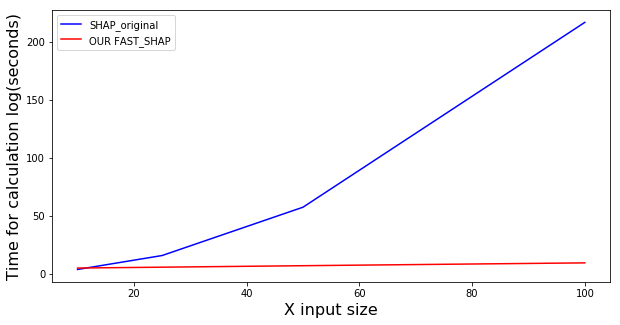

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
x_t = [10,25,50,100]
plt.figure(figsize=(10,5))
plt.plot(x_t, shap_or ,color = "blue")
plt.plot(x_t,my_shap,color = "red")
plt.ylabel('Time for calculation log(seconds)',fontsize = 16)
plt.xlabel('X input size',fontsize = 16)
plt.legend(["SHAP_original","OUR FAST_SHAP"])
#plt.yscale('log')
plt.show()

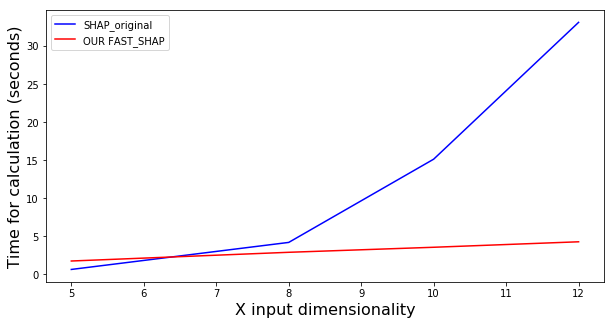

In [78]:
x_d = [5,8,10,12]
plt.figure(figsize=(10,5))
plt.plot(x_d, shap_or_dim ,color = "blue")
plt.plot(x_d,my_shap_dim,color = "red")
plt.ylabel('Time for calculation (seconds)',fontsize = 16)
plt.xlabel('X input dimensionality',fontsize = 16)
plt.legend(["SHAP_original","OUR FAST_SHAP"])
plt.show()